In [9]:
import requests_oauthlib.oauth1_auth
# Working with custom datasets

import torch
from torch import nn

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data")
image_path = data_path/"pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists...")
else:
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print(f"Downloading pizza, steak, sushi data...")
        f.write(request.content)

    with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping data...")
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists...


In [12]:
import os
def walkthrough_dir(dir_path):

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


In [13]:
walkthrough_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [14]:
# Setting up training and testint paths

train_dir = image_path / "train"
test_dir = image_path / "test"

Random image path = data\pizza_steak_sushi\train\sushi\1129338.jpg
Image class : sushi
Image width : 511


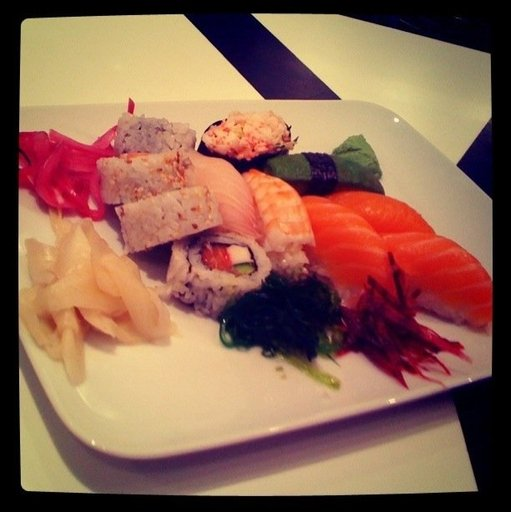

In [15]:
# Visualizing images

import random
from PIL import Image
import matplotlib.pyplot as plt

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path = {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image width : {img.width}")

img

(-0.5, 510.5, 511.5, -0.5)

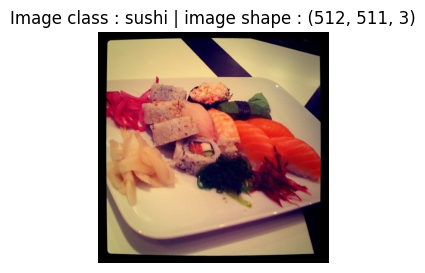

In [16]:
# Showing the image using matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into image array
img_as_array = np.asarray(img)

plt.figure(figsize=(5,3))
plt.imshow(img_as_array)
plt.title(f"Image class : {image_class} | image shape : {img_as_array.shape}")

plt.axis(False)